<div align="center">
    
  <b>Curso: Programación para el Análisis de Datos<span></b>
    
  <b>Ejercicio 3: Agregación, unión y concatenación de DataFrames.</b>
    
  <b>Presentado por: Juan Camilo Betancourt Monsalve</b>
    
  <b>Grupo: 30 </b>
    
  <b>Código: 203008069
    
  <b>Presentado a: Miguel Angel Vargas Valencia</b>
    
  <img src="https://estudios.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" alt="logo universidad UNAD">
    
  
  <b>17/04/2024</b>

</div>

# Resumen

Se revisa la fusión de datos,la agregación , las uniones(joins) y agrupaciones con la biblioteca Pandas.


**Palabras clave:** Pandas, combinación(unión), agregación , agrupación, concatenación.

# Teoría




## **Concatenación**

La concatenación acumula datos abajo o al lado. Los datos faltantes los llena con NaN.

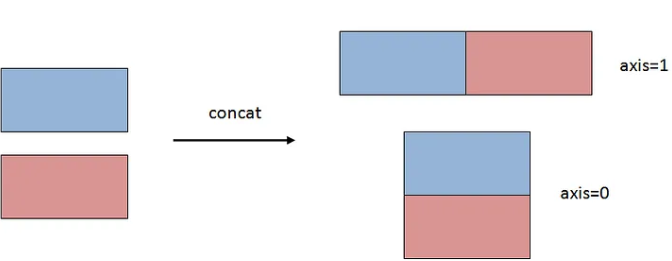


```
pd.concat([df1, df2], axis=0)  # Concatenación vertical (default)
pd.concat([df1, df2], axis=1)  # Concatenación horizontal
```


## Merge - Join

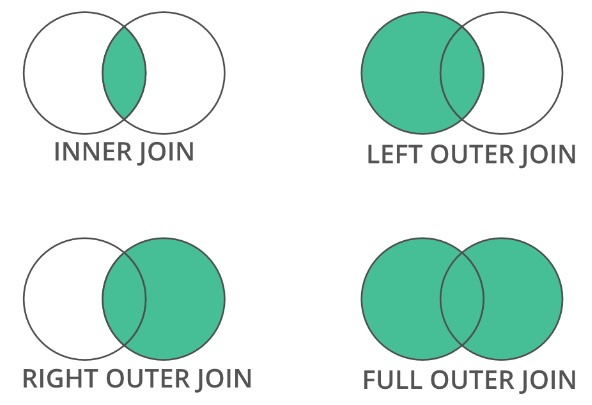




La función merge() o su análoga join() combinan DataFrames en base a una o más columnas comunes.

merge() toma los siguientes parámetros principales:

- left: El DataFrame izquierdo que deseas combinar.

- right: El DataFrame derecho que deseas combinar.

- how: La forma en que se realizará la unión. Puede ser 'inner' (unión interna), 'left' (unión izquierda), 'right' (unión derecha) o 'outer' (unión externa). Por defecto, es 'inner'.

- on: El nombre de la columna o una lista de nombres de columnas que se
utilizarán para realizar la unión. Si las columnas tienen diferentes nombres en los DataFrames, puedes usar left_on y right_on para especificar las columnas del DataFrame izquierdo y derecho, respectivamente.

- suffixes: Tupla de sufijos para añadir a los nombres de las columnas que se solapan. Por defecto, es ('_x', '_y').

## Agrupar datos

Se puede calcular agregaciones agrupando columnas en si mismas o en respecto a otras columnas.

```
df.groupby('column').sum()
```

Se puede halalr en una sola línea varias agregaciones:



```
# de todas las columnas del dataframe
 df.groupby('column').agg(['sum','mean','median','std'])
```

```
# Agrupar los datos para una columna en particular del dataframe:
 df.groupby('column')['column_of_interest'].agg(['sum','mean','median','std'])
```





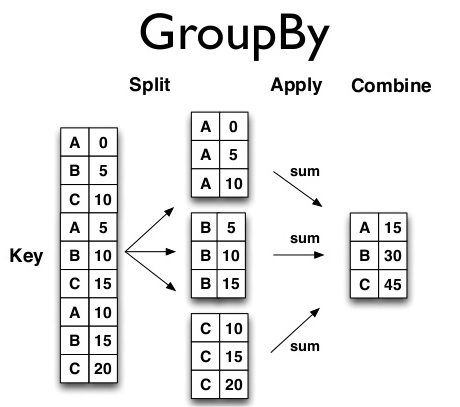

# Cargar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar Datos

Se carga en la variable **df** el conjunto de datos que
se presentan en el archivo CSV, Anexo 1 - **Student Weight Status.csv**,
considerando  el tipo
de separador y los encabezados de las columnas.

In [2]:
# Cargar archivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#guardar en un archivo CSV
df = pd.read_csv('/content/drive/MyDrive/UNAD/PROGRAMACIÓN PARA EL ANÁLISIS DE DATOS/tarea_2_tratamiento_manejo_informacion/Anexo 1 - Student Weight Status.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 0 to 8921
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LOCATION CODE            8922 non-null   int64  
 1   COUNTY                   8838 non-null   object 
 2   AREA NAME                8922 non-null   object 
 3   REGION                   8922 non-null   object 
 4   SCHOOL YEARS             8922 non-null   object 
 5   NO. OVERWEIGHT           8348 non-null   float64
 6   PCT OVERWEIGHT           8353 non-null   float64
 7   NO. OBESE                8352 non-null   float64
 8   PCT OBESE                8377 non-null   float64
 9   NO. OVERWEIGHT OR OBESE  8494 non-null   float64
 10  PCT OVERWEIGHT OR OBESE  8518 non-null   float64
 11  GRADE LEVEL              8922 non-null   object 
 12  AREA TYPE                8922 non-null   object 
 13  STREET ADDRESS           8142 non-null   object 
 14  CITY                    

In [4]:
df.head(2)

,LOCATION CODE,COUNTY,AREA NAME,REGION,SCHOOL YEARS,NO. OVERWEIGHT,PCT OVERWEIGHT,NO. OBESE,PCT OBESE,NO. OVERWEIGHT OR OBESE,PCT OVERWEIGHT OR OBESE,GRADE LEVEL,AREA TYPE,STREET ADDRESS,CITY,STATE,ZIP CODE,LATITUDE,LONGITUDE,Location 1
0,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2010-2012,575.0,18.4,565.0,18.1,1140.0,36.5,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2010-2012,380.0,19.4,416.0,21.3,796.0,40.7,MIDDLE/HIGH,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Desarrollo de los ejercicios

### Fusionando datos:

#### Paso 1:
Cree un DataFrame p1 con los datos del 0 al 1 con las columnas
'area_name' y 'county' de df.

In [5]:
p1 = df[['AREA NAME','COUNTY']][0:2]
p1

,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS


#### Paso 2:

Creen un DataFrame p2 con los datos del 2 al 4 con las
columnas 'area_name' y 'county' de df.

In [6]:
p2 = df[['AREA NAME','COUNTY']][2:5]
p2

,AREA NAME,COUNTY
2,CATTARAUGUS,CATTARAUGUS
3,CATTARAUGUS,CATTARAUGUS
4,CATTARAUGUS,CATTARAUGUS


#### Paso 3:

Concatene p1 y p2 y muestre los resultados.

In [7]:
# Concatenar a lo largo de filas. Coloca un DataFrame encima del otro manteniendo los indices.
concat_axis0 = pd.concat([p1, p2])
concat_axis0

,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS
2,CATTARAUGUS,CATTARAUGUS
3,CATTARAUGUS,CATTARAUGUS
4,CATTARAUGUS,CATTARAUGUS


#### Paso 4:

Se concatena p1 y p2 identificando las asignaciones por las llaves ‘p1’ y ‘p2’ y se muestra los resultados y se asígnan a la variable concatened. Comente las diferencias con el DataFrame anterior y mencione desde su punto de vista las posibles utilidades de
esta herramienta.

In [8]:
concat2 = pd.concat([p1,p2], keys=['p1','p2'])
concat2

AREA NAME       COUNTY
p1 0  CATTARAUGUS  CATTARAUGUS
   1  CATTARAUGUS  CATTARAUGUS
p2 2  CATTARAUGUS  CATTARAUGUS
   3  CATTARAUGUS  CATTARAUGUS
   4  CATTARAUGUS  CATTARAUGUS

**Respuesta**: Esta herramienta es útil para identificar cuáles son los aportes de cada DataFrame en la concatenación final para después poder recuperar las filas de cada DataFrame.

#### Paso 5:

Desde el DataFrame concat2 rescate los datos de p1.

In [9]:
datos_p1  = concat2.loc['p1']
datos_p1

,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS


#### Paso 6:



Comente los resultados y realice las conclusiones del ejercicio

**Respuesta:** Pandas permite concatenar DataFrames facilmente en ambos ejes. Se coloca uno encima del otro si el parámetro axis vale 0 o está por defecto, o se coloca uno al lado del otro si el parametro axis vale 1. Además se puede especificar los aportes de cada Dataframe para después revertir los cambios.

### Operaciones de agregación

#### Paso 1:


Encuentre el número promedio de estudiantes que son obesos
en escuelas de primaria (tipo ‘ELEMENTARY’).

In [10]:
df.loc[ df['GRADE LEVEL']=='ELEMENTARY' , ['NO. OBESE'] ].mean()

NO. OBESE    275.786762
dtype: float64

**Respuesta:** El promedio de estudiantes de grado elementos obesos es 275.78

#### Paso 2:

Encuentre el número total de estudiantes de primaria que son
obesos.

In [11]:
df.loc[ df['GRADE LEVEL']=='ELEMENTARY' , ['NO. OBESE'] ].sum()

NO. OBESE    770824.0
dtype: float64

**Respuesta:** El número de estudiantes de elemental obesos es de 770824

#### Paso 3:

Encuentre el número máximo de estudiantes obsesos que tiene
una escuela.

In [12]:
df.loc[ df['GRADE LEVEL']=='ELEMENTARY' , ['NO. OBESE'] ].max()

NO. OBESE    49140.0
dtype: float64

**Respuesta:** La escuela con más estudiantes obesos  tiene 49140.

#### Paso 4:

Encuentre el número mínimo de estudiantes obsesos que tiene
una escuela.

In [13]:
df.loc[ df['GRADE LEVEL']=='ELEMENTARY' , ['NO. OBESE'] ].min()

NO. OBESE    5.0
dtype: float64

**Respuesta:** La escuela con menos estudiantes obesos  tiene 5

#### Paso 5:


Obtenga la desviación estándar del número de estudiantes
obsesos en las escuelas.

In [14]:
df.loc[ df['GRADE LEVEL']=='ELEMENTARY' , ['NO. OBESE'] ].std()

NO. OBESE    2021.124815
dtype: float64

**Respuesta**: Como la desviciación estándar es mucho más grande que el promedio(275.78), se intuye que los datos están muy dispersos, es decir, los datos tienden a variar significativamente alrededor de la media. Hay valores extremos muy alejados de la media.

#### Paso 6:

Obtenga la cantidad de escuelas de primarias en el condado
(county) de DELAWARE.

In [15]:
df.loc[ (df['GRADE LEVEL']=='ELEMENTARY') & (df['COUNTY']=='DELAWARE'), 'COUNTY'].count()

52

**Respuesta**: Hay 52 escuelas primarias en el codnado de DELAWARE

#### Paso 7:

Comente los resultados del ejercicio y concluya con las
posibilidades de uso de estas herramientas en su campo de
acción.

**Respuesta**: Las operaciones de agregación pueden ser útiles en mi campo de acción para extraer indicadores clave de rendimiento(KPI) como el nivel de servicio promedio de las conversaciones, el tiempo promedio que tardan los agentes por nivel de atención en atender , etc.

### Uniones (Joins):

#### Paso 1:

Defina un DataFrame de búsqueda llamado grade_lookup, que
tenga las columnas ‘grade_level y ‘level’ que asigne niveles a
cada uno de los grados como sigue: 1 a 'ELEMENTARY', 2 a
'MIDDLE/HIGH', 3 a 'MISC'.

In [16]:
grade_lookup = pd.DataFrame({'GRADE LEVEL':pd.Series(['ELEMENTARY','MIDDLE/HIGH','MISC']),
                             'LEVEL':pd.Series([1,2,3]) })
grade_lookup

,GRADE LEVEL,LEVEL
0,ELEMENTARY,1
1,MIDDLE/HIGH,2
2,MISC,3


#### Paso 2:


Por otro lado, tome las primeras cinco filas de la columna de
datos en la columna GRADE e imprímalas (Téngalas en cuenta
pues las utilizaremos para estudiar los tipos de uniones).

In [17]:
fil_grade = pd.DataFrame( df['GRADE LEVEL'][:5] )
fil_grade

,GRADE LEVEL
0,ELEMENTARY
1,MIDDLE/HIGH
2,DISTRICT TOTAL
3,ELEMENTARY
4,MIDDLE/HIGH


#### Paso 3:

Describa los **inner joins** y realice un ejemplo con las primeras 5
filas de la columna grade_level y grade_lookup, muestre sus
resultados y explíquelos.

**inner join**: Devuelve los elementos coincidentes de ambos conjuntos.

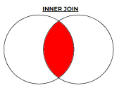

In [18]:
# ON: dónde coinciden para la unión?
# how: tipo de unión ?

inner_join = fil_grade.join(grade_lookup.set_index(['GRADE LEVEL']) , on= ['GRADE LEVEL'] , how = "inner")
inner_join

,GRADE LEVEL,LEVEL
0,ELEMENTARY,1
3,ELEMENTARY,1
1,MIDDLE/HIGH,2
4,MIDDLE/HIGH,2


In [19]:
# Se puede hacer la unión más facil con merge, pero se pierden los indices:
pd.merge(fil_grade , grade_lookup , on='GRADE LEVEL', how='inner')

,GRADE LEVEL,LEVEL
0,ELEMENTARY,1
1,ELEMENTARY,1
2,MIDDLE/HIGH,2
3,MIDDLE/HIGH,2


#### Paso 4:



Describa los **left outer joins** y realice un ejemplo con las
primeras 5 filas de la columna grade_level y grade_lookup,
muestre sus resultados y explíquelos.

**left join:** Sobreviven todos los datos del conjunto   de la izquierda y agrega los datos de la derecha, si no hay coincidencia deja un NaN.

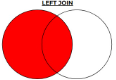

In [20]:
# En este caso, sobreviven todos los registros del conjunto de la izquierda(fil_grade), pero como DISTRICT TOTAL no
# tiene LEVEL retorna NaN

left_join = fil_grade.join(grade_lookup.set_index(['GRADE LEVEL']) , on= ['GRADE LEVEL'] , how = "left")
left_join

,GRADE LEVEL,LEVEL
0,ELEMENTARY,1.0
1,MIDDLE/HIGH,2.0
2,DISTRICT TOTAL,NaN
3,ELEMENTARY,1.0
4,MIDDLE/HIGH,2.0


In [21]:
# Se puede hacer la unión tipo left  con merge:
pd.merge(fil_grade , grade_lookup , on='GRADE LEVEL', how='left')

,GRADE LEVEL,LEVEL
0,ELEMENTARY,1.0
1,MIDDLE/HIGH,2.0
2,DISTRICT TOTAL,NaN
3,ELEMENTARY,1.0
4,MIDDLE/HIGH,2.0


#### Paso 5:

Describa los **full outer joins** y realice un ejemplo con las
primeras 5 filas de la columna grade_level y grade_lookup,
muestre sus resultados y explíquelos.

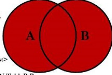

In [22]:
# En este caso, sobreviven todos, haya o no coincidencia
# Las no coincidecnia se dejan como un NaN

outer = fil_grade.join(grade_lookup.set_index(['GRADE LEVEL']) , on= ['GRADE LEVEL'] , how = "outer")
outer

,GRADE LEVEL,LEVEL
0.0,ELEMENTARY,1.0
3.0,ELEMENTARY,1.0
1.0,MIDDLE/HIGH,2.0
4.0,MIDDLE/HIGH,2.0
2.0,DISTRICT TOTAL,NaN
NaN,MISC,3.0


In [23]:
# Se puede hacer la unión tipo outer  con merge,pero los incides son nuevos.
pd.merge(fil_grade , grade_lookup , on='GRADE LEVEL', how='outer')

,GRADE LEVEL,LEVEL
0,ELEMENTARY,1.0
1,ELEMENTARY,1.0
2,MIDDLE/HIGH,2.0
3,MIDDLE/HIGH,2.0
4,DISTRICT TOTAL,NaN
5,MISC,3.0


### Agrupaciones:

#### Paso 1:

Encontrar la suma del número de estudiantes obesos en cada
uno de los grados mediante el uso de la función groupby de
pandas. Muestre sus resultados y explíquelo.

In [24]:
groupby1 = df.groupby('GRADE LEVEL')['NO. OBESE'].sum()
groupby1

GRADE LEVEL
DISTRICT TOTAL    1359576.0
ELEMENTARY         770824.0
MIDDLE/HIGH        577812.0
Name: NO. OBESE, dtype: float64

Text(0.5, 1.0, 'Histograma de obesidad por nivel de grado')

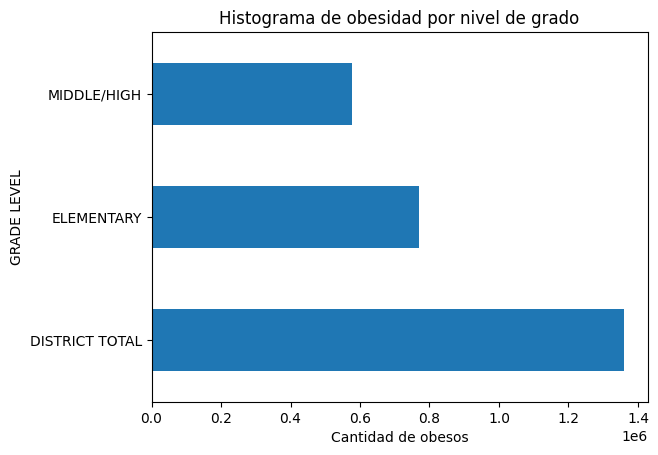

In [25]:
# Graficar un histograma
#groupby1.plot(kind='bar')
# Graficar un histograma horizontal
groupby1.plot(kind='barh')
# Añadir etiquetas y título
plt.xlabel('Cantidad de obesos')
plt.ylabel('GRADE LEVEL')
plt.title('Histograma de obesidad por nivel de grado')

**Respuesta**: Se observa que la cantidad de obesos es mucho mayor en DISTRICT TOTAL, y le sigue los estudinates de primaria(ELEMENTARY)

#### Paso 2:



Muestre diferentes tipos de agregación por suma, media y
desviación estándar de los estudiantes obsesos en cada uno de
los grados.

In [26]:
groupby2_many = df.groupby('GRADE LEVEL')['NO. OBESE'].agg(['sum','mean','median','std'])
groupby2_many

,sum,mean,median,std
GRADE LEVEL,,,,
DISTRICT TOTAL,1359576.0,473.719861,92.0,3502.973168
ELEMENTARY,770824.0,275.786762,52.0,2021.124815
MIDDLE/HIGH,577812.0,215.039821,44.0,1532.055998


**Respuesta:** Se observa que todos los niveles presentan un alto grado de dispersión ya que su desviación estándar(std) tiene valores alejados de la media y de la mediana(que es más ressitente a los valores extremos).

En mi campo de acción es util calcular multiples funciones de agregación para la reportería. Por ejemplo, clasificar los afiliados a una EPS según el plan al que pertenezcan según el número de beneficiarion, información que es recopilada por la traza de los bots.

# Coclusiones


- La concatenación acumula conjuntos de datos que tienen el mismo número de columnas si la unión es en base al eje x, lo cual es útil en mi área de acción en bots, ya que los clientes pueden compartir al comienzo del proyecto *n* registros y después solicitar aumentarlos. Por ejemplo, si brindan un conjunto de preguntas y respuestas para montar una base de conocimiento de un bot con inteligencia artifial en la fase 1, puede que en una segunda fase soliciten mejorar la base acumulando más preguntas /respuestas.

- La concatenación también permite agregar al lado más columnas si la unión es en base al eje vertical(axis=1) lo cual es util para mejorar la base de conocimiento de un bot, puede que el cliente solicite agregar por cada pregunta una lista de intenciones lo cual solo implica concatenar una Serie.

- Suponiendo que un bot tiene una base de conocimiento, el cliente puede solicitar un formulario de mantenimiento para editar las preguntas/respuestas e intenciones según una reportería. De esta manera es conveniente normalizar la tabla separando preguntas/respuestas de intenciones para hacer cambios en cascada. Si después el cliente solicita descargar la tabla de conocimiento completa se debe desnormalizar las tablas lo cual se puede lograr con un merge uniendo en base a la clave primnaria de las intenciones.

- Los reportes de trazabilidad de un bot manejan multiples métricas como tiempo de servicio, tiempo de deserción, tiempo de espera en ACD,etc. Las funciones de agregación resultan útiles para presentar infomes al cliente que resuman los datos(KPI).

# Bibliografía

Samir Madhavan. (2015). Mastering Python for Data Science:
Explore the World of Data Science Through Python and Learn How
to Make Sense of Data. Packt Publishing. (pp. 19-25).